In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


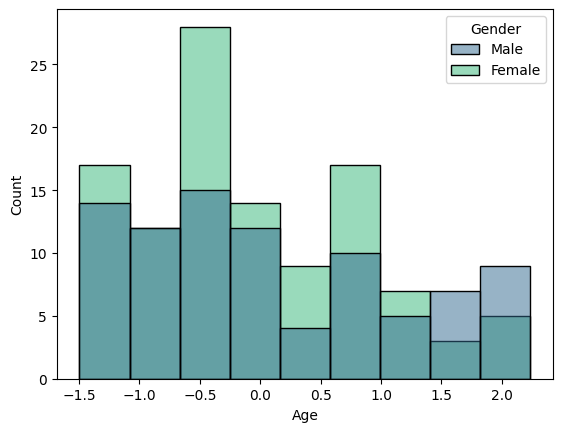

In [62]:
sns.histplot(data=df, x='Age', hue='Gender', palette='viridis')
plt.show()

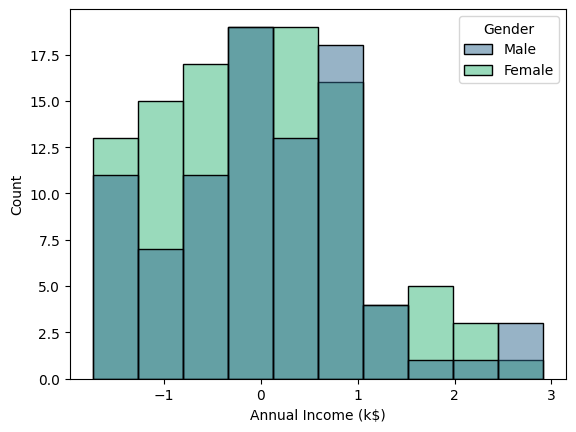

In [63]:
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', palette='viridis')
plt.show()

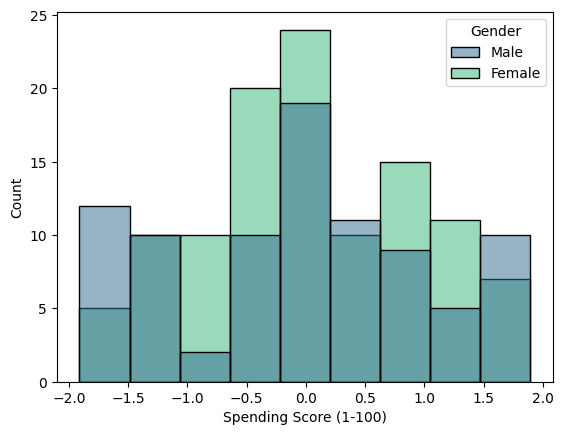

In [64]:
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.show()

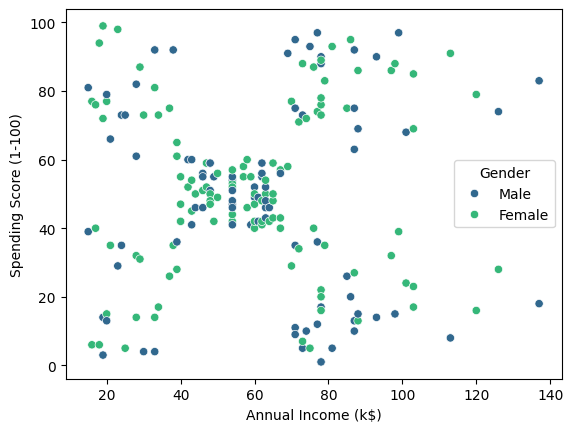

In [58]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.show()

In [59]:
df.drop('CustomerID', axis=1, inplace=True)

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

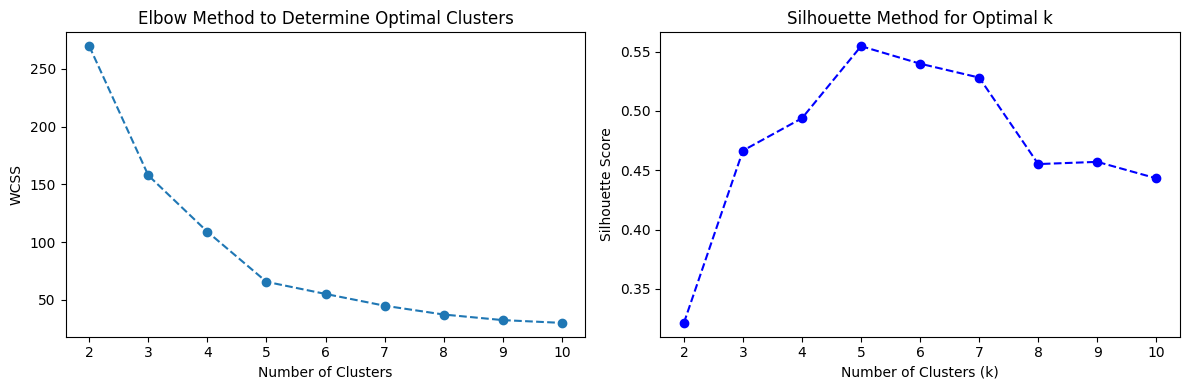

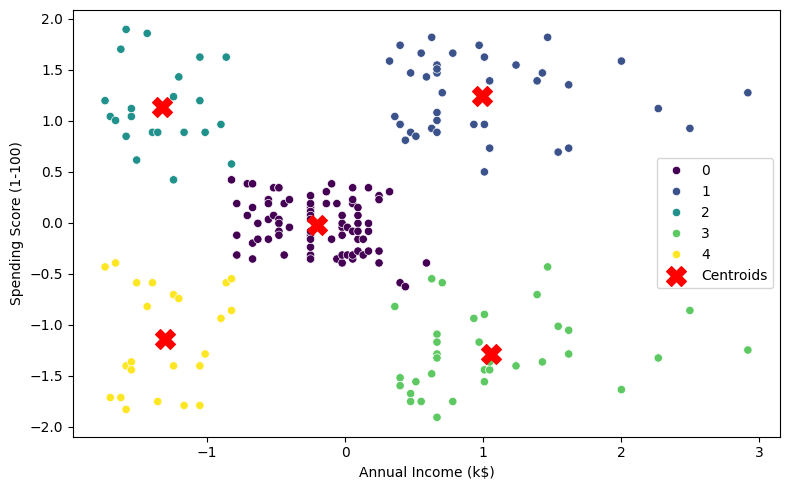

In [66]:
# Feature Scaling
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Finding the optimal number of clusters using the Elbow Method
wcss = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 4))

# Plotting the Elbow Method graph
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal Clusters')

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')

plt.tight_layout()
plt.show()

# Applying K-Means with the optimal number of clusters (e.g., 5 based on elbow method)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=y_kmeans, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.tight_layout()
plt.show()